In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('E:/AQI/Data/Real-Data/Real_Combine.csv')

In [3]:
df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


In [4]:
df.head().append(df.tail())

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833
1088,18.1,24.0,11.2,1015.4,56.0,1.8,15.9,25.9,288.416667
1089,17.8,25.0,10.7,1015.8,54.0,2.3,9.4,22.2,256.833333
1090,13.9,24.5,11.4,1015.0,95.0,0.6,8.7,14.8,169.000000
1091,16.3,23.0,9.8,1016.9,78.0,1.1,7.4,16.5,186.041667
1092,16.3,23.4,9.0,1017.3,68.0,1.3,7.8,18.3,185.583333


In [5]:
df.shape

(1093, 9)

In [6]:
df.describe()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
count,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1092.000000
mean,26.009241,32.482251,19.460201,1008.081885,62.918573,2.003111,6.751510,15.805124,109.090984
std,7.237401,6.679078,7.438653,7.529237,15.709816,0.747541,3.841137,7.308435,84.465790
min,6.700000,9.800000,0.000000,991.500000,20.000000,0.300000,0.400000,1.900000,0.000000
25%,19.300000,27.800000,12.100000,1001.100000,54.000000,1.600000,3.700000,11.100000,41.833333
50%,28.200000,34.200000,21.200000,1008.100000,64.000000,1.900000,6.500000,14.800000,83.458333
75%,31.700000,37.000000,26.000000,1015.000000,74.000000,2.600000,9.100000,18.300000,158.291667
max,38.500000,45.500000,32.700000,1023.200000,98.000000,5.800000,24.400000,57.600000,404.500000


In [7]:
df.columns

Index(['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM', 'PM 2.5'], dtype='object')

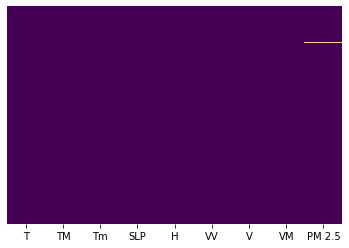

In [8]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [9]:
df[df['PM 2.5'].isnull()==True]

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
184,14.3,19.2,10.9,1020.5,91.0,1.6,4.8,11.1,NaN


In [10]:
df.dropna(inplace=True)

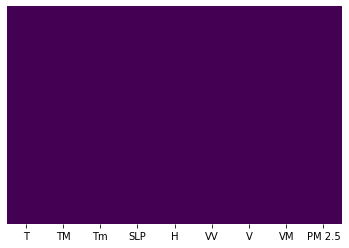

In [11]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [12]:
df[df['PM 2.5'].isnull()==True]

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5


In [13]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
 X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=0)

In [16]:
X_test

,T,TM,Tm,SLP,H,VV,V,VM
785,33.1,39.0,24.0,1003.0,26.0,2.6,10.4,24.1
742,12.0,17.0,6.7,1019.8,75.0,1.3,7.6,13.0
748,15.2,22.6,6.6,1018.2,56.0,1.9,8.9,22.2
986,32.9,39.0,27.4,996.6,50.0,2.4,9.4,27.8
480,29.4,34.4,26.4,999.9,86.0,1.8,2.2,14.8
...,...,...,...,...,...,...,...,...
413,27.7,35.6,20.4,1011.7,54.0,2.7,7.4,24.1
487,29.5,34.5,27.6,1002.0,77.0,1.9,8.5,18.3
50,29.2,37.5,20.0,1006.1,38.0,2.6,5.9,14.8
162,17.6,25.6,11.2,1015.2,68.0,1.1,3.5,14.8


In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
regressor=LinearRegression()

In [19]:
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
print("coefficent determination of R^2 is {}".format(regressor.score(X_train,y_train)))

coefficent determination of R^2 is 0.5525251035315382


In [21]:
print("coefficent determination of R^2 is {}".format(regressor.score(X_test,y_test)))

coefficent determination of R^2 is 0.48762190542053335


In [22]:
from sklearn.model_selection import cross_val_score

In [51]:
mse=cross_val_score(regressor,X,y,cv=5,scoring='neg_mean_squared_error')

In [52]:
mean_mse=np.mean(mse)

In [53]:
mean_mse

-3686.201777339885

# Ridge and Lasso

In [56]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [59]:
ridge=Ridge()

In [61]:
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}

In [92]:
ridge_Regressor=GridSearchCV(ridge,param_grid=parameters,cv=5,scoring='neg_mean_squared_error')

In [93]:
ridge_Regressor

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [94]:
ridge_Regressor.fit(X,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [95]:
print(ridge_Regressor.best_params_)

{'alpha': 40}


In [96]:
print(ridge_Regressor.best_score_)

-3664.36489960717


# Lasso Regression

In [97]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

In [98]:
lasso=Lasso()

In [103]:
Lasso_regressor=GridSearchCV(lasso,parameters,cv=5,scoring='neg_mean_squared_error')

In [104]:
Lasso_regressor.fit(X,y)

c:\users\admin\anaconda3\envs\aqi\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1444197.3511959247, tolerance: 614.5592033746461
  positive)
c:\users\admin\anaconda3\envs\aqi\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1568739.7813254024, tolerance: 678.9710639134809
  positive)
c:\users\admin\anaconda3\envs\aqi\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1456481.2227170018, tolerance: 626.8737580831347
  positive)
c:\users\admin\anaconda3\envs\aqi\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to incre

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [105]:
print(Lasso_regressor.best_params_)

{'alpha': 1}


In [106]:
print(Lasso_regressor.best_score_)

-3666.7832534370186


# Model Evaluation

In [111]:
prediction=Lasso_regressor.predict(X_test)


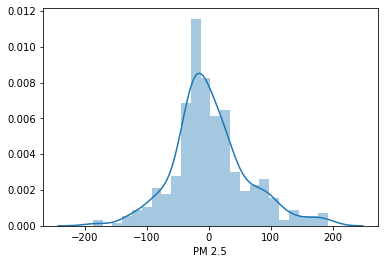

In [113]:
sns.distplot(y_test-prediction)

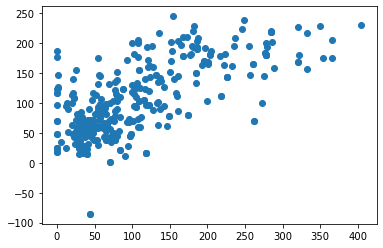

In [114]:

plt.scatter(y_test,prediction)

# Regression Evaluation Metrics

Here are three common evaluation metrics for regression problems:

Mean Absolute Error (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$
Mean Squared Error (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$
Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$
Comparing these metrics:

MAE is the easiest to understand, because it's the average error.
MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.
All of these are loss functions, because we want to minimize them.

In [116]:
from sklearn import metrics

In [118]:

print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 44.505896704691864
MSE: 3633.4770303615883
RMSE: 60.27832969120485


In [124]:
X_test

,T,TM,Tm,SLP,H,VV,V,VM
785,33.1,39.0,24.0,1003.0,26.0,2.6,10.4,24.1
742,12.0,17.0,6.7,1019.8,75.0,1.3,7.6,13.0
748,15.2,22.6,6.6,1018.2,56.0,1.9,8.9,22.2
986,32.9,39.0,27.4,996.6,50.0,2.4,9.4,27.8
480,29.4,34.4,26.4,999.9,86.0,1.8,2.2,14.8
...,...,...,...,...,...,...,...,...
413,27.7,35.6,20.4,1011.7,54.0,2.7,7.4,24.1
487,29.5,34.5,27.6,1002.0,77.0,1.9,8.5,18.3
50,29.2,37.5,20.0,1006.1,38.0,2.6,5.9,14.8
162,17.6,25.6,11.2,1015.2,68.0,1.1,3.5,14.8


In [130]:
Lasso_regressor.best_score_

-3666.7832534370186

In [119]:
import pickle

In [135]:
filename='Lasso_regressor.sav'
pickle.dump(Lasso_regressor,open(filename,'wb'))